In [4]:
import pandas as pd
import seaborn as sns #if not found install using %pip install seaborn
import numpy as np

Missing Data Count:
 Name       1
Age        1
Country    1
Score      1
dtype: int64


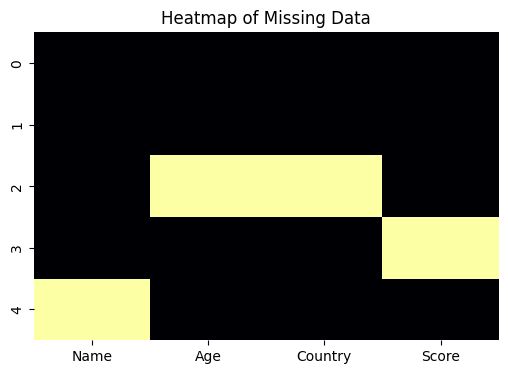

In [6]:
import matplotlib.pyplot as plt

# Sample data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', None],
    'Age': [25, 30, np.nan, 40, 22],
    'Country': ['USA', 'USA', None, 'UK', 'USA'],
    'Score': [85, 90, 88, np.nan, 95]
}
    
df = pd.DataFrame(data)

# Checking for missing values
print("Missing Data Count:\n", df.isnull().sum())

# Visualizing missing data with a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(), cbar=False, cmap="inferno")
plt.title("Heatmap of Missing Data")
plt.show()


In [7]:
import pandas as pd

# Sample DataFrame
data = {'Name': ['Alice', 'Bob', None, 'David'],
        'Age': [24, None, 22, 28],
        'Score': [85, 90, None, 88]}

df = pd.DataFrame(data)

# Drop rows with any missing values
df_drop_rows = df.dropna()

print(df_drop_rows)


    Name   Age  Score
0  Alice  24.0   85.0
3  David  28.0   88.0


In [8]:
# Fill missing values with the mean of the column 'Age'
df_mean_imputation = df.copy()
df_mean_imputation['Age'].fillna(df['Age'].mean(), inplace=True)

print(df_mean_imputation)


    Name        Age  Score
0  Alice  24.000000   85.0
1    Bob  24.666667   90.0
2   None  22.000000    NaN
3  David  28.000000   88.0


/tmp/ipykernel_177098/457834423.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean_imputation['Age'].fillna(df['Age'].mean(), inplace=True)


In [9]:
# Fill missing values with the median of the column 'Score'
df_median_imputation = df.copy()
df_median_imputation['Score'].fillna(df['Score'].median(), inplace=True)

print(df_median_imputation)

    Name   Age  Score
0  Alice  24.0   85.0
1    Bob   NaN   90.0
2   None  22.0   88.0
3  David  28.0   88.0


/tmp/ipykernel_177098/3062007869.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_median_imputation['Score'].fillna(df['Score'].median(), inplace=True)


In [10]:
# Fill missing values with the mode of the column 'Name'
df_mode_imputation = df.copy()
df_mode_imputation['Name'].fillna(df['Name'].mode()[0], inplace=True)

print(df_mode_imputation)

    Name   Age  Score
0  Alice  24.0   85.0
1    Bob   NaN   90.0
2  Alice  22.0    NaN
3  David  28.0   88.0


/tmp/ipykernel_177098/3180943647.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mode_imputation['Name'].fillna(df['Name'].mode()[0], inplace=True)


In [12]:
from sklearn.impute import KNNImputer

# Create KNN Imputer
imputer = KNNImputer(n_neighbors=2)

# Apply KNN Imputer
df_knn_imputation = pd.DataFrame(imputer.fit_transform(df[['Age', 'Score']]), columns=['Age', 'Score'])

print(df_knn_imputation)




ModuleNotFoundError: No module named 'sklearn'

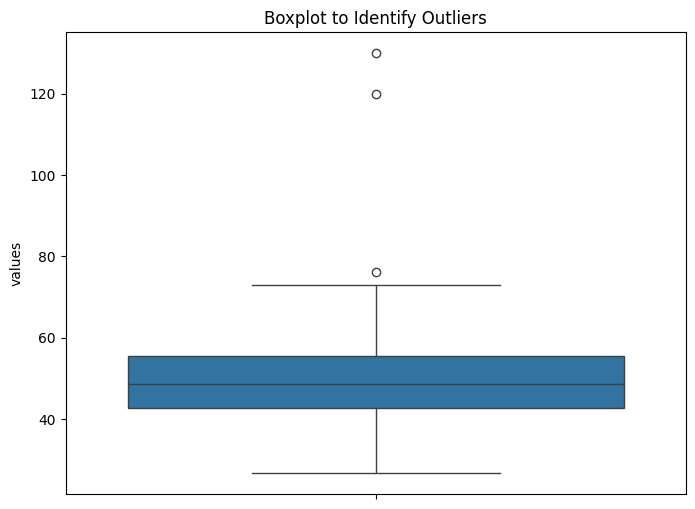

Outliers using Z-score:
     values   z_score
98   120.0  4.854008
99   130.0  5.556677
Outliers using IQR:
         values   z_score
46   76.049323  1.765729
98  120.000000  4.854008
99  130.000000  5.556677


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = pd.DataFrame({
    'values': np.random.normal(loc=50, scale=10, size=100)
})
data.loc[98] = 120  # Add an outlier
data.loc[99] = 130  # Add another outlier

# Boxplot for identifying outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data['values'])
plt.title('Boxplot to Identify Outliers')
plt.show()

# Z-score method to identify outliers
from scipy import stats

data['z_score'] = np.abs(stats.zscore(data['values']))
outliers_zscore = data[data['z_score'] > 3]

# IQR method
Q1 = data['values'].quantile(0.25)
Q3 = data['values'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = data[(data['values'] < (Q1 - 1.5 * IQR)) | (data['values'] > (Q3 + 1.5 * IQR))]

print("Outliers using Z-score:\n", outliers_zscore)
print("Outliers using IQR:\n", outliers_iqr)


In [1]:
# Trimming/Removing outliers
data_trimmed = data[(data['values'] > (Q1 - 1.5 * IQR)) & (data['values'] < (Q3 + 1.5 * IQR))]

# Log transformation
data['log_values'] = np.log(data['values'] + 1)

# Winsorizing (Capping)
from scipy.stats import mstats
data['winsorized'] = mstats.winsorize(data['values'], limits=[0.05, 0.05])

# Plotting the transformations
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(data['values'], kde=True)
plt.title('Original Data')

plt.subplot(1, 3, 2)
sns.histplot(data['log_values'], kde=True)
plt.title('Log Transformed Data')

plt.subplot(1, 3, 3)
sns.histplot(data['winsorized'], kde=True)
plt.title('Winsorized Data')

plt.tight_layout()
plt.show()


NameError: name 'data' is not defined